<a href="https://colab.research.google.com/github/mahidhiman12/pytorch/blob/main/4_PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a classification problem?

- In machine learning, a classification problem involves categorizing data into predefined classes or categories. Essentially, the goal is to train a model to predict which category a new, unseen data point belongs to, based on its features

1. Spam detection: Classifying emails as either spam or not spam.
2. Image recognition: Identifying objects in images, like cats or dogs.
3. Medical diagnosis: Predicting whether a patient has a disease or not.
4. Customer segmentation: Dividing customers into different groups based on their behavior

Types of Classification:
1. **Binary Classification**: Involves two classes (e.g., spam/not spam).
2. **Multiclass Classification**: Involves more than two classes (e.g., classifying handwritten digits 0-9).
3. **Multilabel classification** : Involves more than two labels
3. **Imbalanced Classification**: Occurs when the number of data points in each class is unevenly distributed

**Now** , Except instead of trying to predict a straight line (predicting a number, also called a regression problem), we'll be working on a classification problem.

## Architecture of a classification model:

- Input layer shape (`in_features`) : Same as number of features ( eg: 5 for age , swx , height , weight , smoking status in heart disease prediction)

- Hidden layers : Problem specific , min 1 , max - unlimited

- Neurons per hidden layer : Problem specific , generally 10 to 512

- Output layer shape (`out_features`): 1 in binary classification , 1 per class in multiclass classification

- Hidden layer activation : Usually ReLU but can be others

- Output activation : Sigmoid in binary classification , Softmax in Multiclass classification

- Loss function : Binary crossentropy in binary classification , Cross entropy in multiclass classification

- Optimizer : Can be any , eg: SGD , Adam etc

# Make classification data and get it ready

In [1]:
import sklearn
import torch

In [2]:
from sklearn.datasets import make_circles

# Make 1000 sampkes
n_samples = 1000

# Create circles
# Remember , X - feature matrix so thats in capital , y(labels) - scalar
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
# X:features
# y:labels
len(X) , len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"\n First 5 samples of y : {y[:5]}")

# We have 2 features of X , which relates to one label of  y

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

 First 5 samples of y : [1 1 1 1 0]


In [5]:
# Lets have a look at y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

All 0s and 1s , We have 2 classes (0 or 1) , Thats binary classification

## Make DataFrame of circle data using pandas

In [6]:
import pandas as pd
# [ 0.75424625  0.23148074]
#       X1          X2

# Everything in the 0th index wil be X1 , and everything in the first index
# is X2

circles = pd.DataFrame({"X1": X[: , 0] ,
                        "X2": X[: , 1] ,
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


## Visualize data using matplotlib

Text(0, 0.5, 'X2')

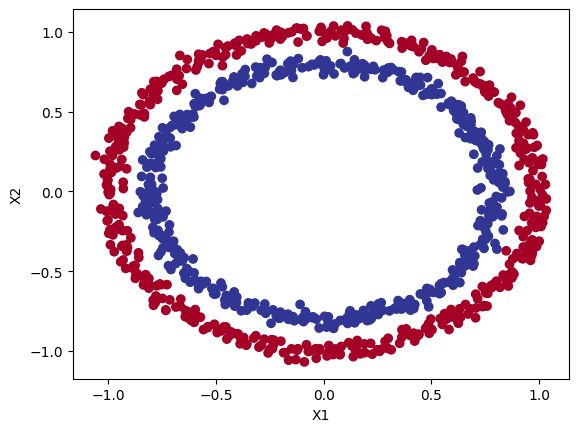

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0],
            y = X[: , 1],
            c = y,
            cmap = plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

So what are we trying to do here?

This is our data and we are working on classification , i.e we are trying to predict if something is one thing or another

So our problem is that we are trying to seperate these two circles

Given two numbers (X1 , X2) which are the two coordinates here , we want to predict the label , is it going to be a blue dot or a red dot?

Note: The data we are working on is often referred to as a toy dataset , a dataset that is small enough to experiment with
but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes:

We are working with PyTorch , SO we want the data to be in tensors

In [8]:
# X has 2 features and y is a scalar
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"""Value for one sample of X : {X_sample} ,
      \n and value for one sample of y : {y_sample}""")

print(f"""\n Shapes for one sample of X : {X_sample.shape} ,
      \n and shapes for one sample of y : {y_sample.shape}""")

Value for one sample of X : [0.75424625 0.23148074] ,
      
 and value for one sample of y : 1

 Shapes for one sample of X : (2,) ,
      
 and shapes for one sample of y : ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
torch.__version__

'2.6.0+cu124'

In [11]:
# convert data from numpy to tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32) # Also convert y to a tensor

In [12]:
type(X) , type(y) , X.dtype , y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [13]:
# Split
from sklearn.model_selection import train_test_split
# train_test_split splits arrays or matrices into random train and test subsets
# random state is just like random seed in sklearn
X_train , X_test  ,  y_train , y_test = train_test_split(X,
                                                         y ,
                                                         test_size = 0.2 ,
                                                         random_state = 42
                                                         )

In [14]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

### 2. Building a model

Lets build a model to classify our blue and red dots

To do so, we want to:

1. Set up device agnostic code so our code will run on an GPU if there is one

2. Construct a model (by subclassing nn.Module)

3. Define a loss function and optimizer

4. Create a training and testing loop

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we have setup device agnostic code , lets create a model that:

1. Subclasses `nn.Module` : almost all models in PyTorch subclass `nn.Module`

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3. Define a `forward()` method that outlines the forward pass (or forward computation) of our model

4. Instantiate an instance of our model class and send it to the target `device`

- The more hidden features theres are , the more opportunity our model has to learn patterns in the data , So to begin with , it has only 2 numbers to learn patterns on , but when we upscale it to 5 , it has 5 numbers to learn patterns on

- its like -> in_features : no of inputs , out_features : no of neurons

- no of neurons are generally multiples of 8

In [16]:
from torch import nn
# 1.

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2.
    # X has 2 features so in features is 2 and upscales to 5 features
    self.Layer1 = nn.Linear(in_features =2 , out_features = 5)
    # out features of previous layer should match with in features of another layer
    # thats how we connect layers
    self.layer2 = nn.Linear(in_features=5 , out_features=1)

  #  3.
  def forward(self,x):
    return self.layer2(self.layer1(X))
    # x-> layer1 -> layer2 -> output

# 4.
model_0 = CircleModelV1().to(device)
model_0


CircleModelV1(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

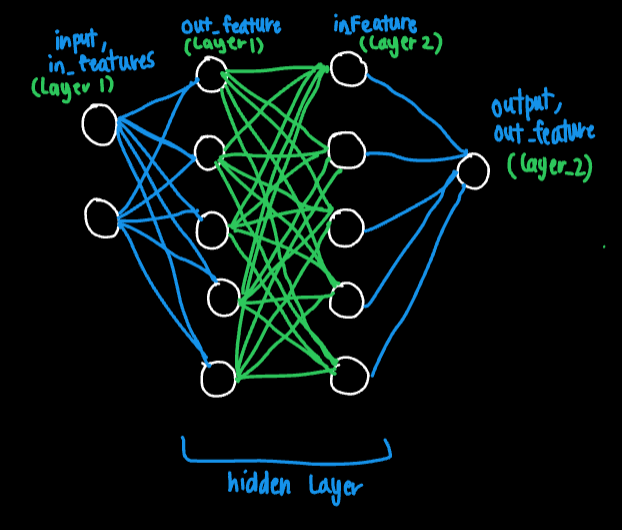

In [17]:
# check models parameters device
next(model_0.parameters()).device

device(type='cuda', index=0)

- Check out Tensorflow playground to understand neural networks , we can replicate it there manually

- Lets replicate the above model using nn.sequential

In [18]:
# nn.sequential
model_0 = nn.Sequential(
    nn.Linear(in_features= 2 , out_features= 5),
    nn.Linear(in_features= 5 , out_features= 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

- In the context of neural networks, nn.Sequential (specifically in PyTorch, but similar concepts exist in other frameworks) refers to a container module that allows for the creation of neural network layers in a sequential, ordered manner. It is a convenient way to define the forward pass of a model where the output of one layer directly becomes the input of the next layer.

- Basically , it does everything behind the scenes that we were doing manually with nn.Module . It implements most of the code for us behind the scenes

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0606,  0.1837],
                      [-0.0226, -0.3081],
                      [-0.4773, -0.6528],
                      [ 0.0832,  0.4472],
                      [ 0.4150,  0.2373]], device='cuda:0')),
             ('0.bias',
              tensor([-6.2695e-01,  4.1851e-01,  5.3763e-04, -3.1481e-01,  1.6453e-01],
                     device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1391,  0.3132, -0.0483, -0.3845, -0.4041]], device='cuda:0')),
             ('1.bias', tensor([-0.0571], device='cuda:0'))])

### Make predictions with untrained data

In [20]:
with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f"""Length of predictions : {len(untrained_pred)} \n
Shape of predictions : {untrained_pred.shape}""")

print(f"""\n Length of test samples : {len(X_test)} \n
Shape of test samples : {X_test.shape}""")

print(f"\n First 10 predictions : {untrained_pred[:10]}")
print(f"\n First 10 labels : {y_test[:10]}")


Length of predictions : 200 

Shape of predictions : torch.Size([200, 1])

 Length of test samples : 200 

Shape of test samples : torch.Size([200, 2])

 First 10 predictions : tensor([[-0.1027],
        [-0.2564],
        [ 0.2612],
        [-0.2056],
        [ 0.1993],
        [ 0.1060],
        [-0.2777],
        [-0.1931],
        [ 0.2633],
        [-0.2673]], device='cuda:0')

 First 10 labels : tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Loss function and Optimizer

- For regression model the loss function that we can use is MAE , MSE

- For classification , you might want binary cross entropy or categorical cross entropy (or just cross entropy)

- The loss function measures how *wrong* your predictions are

- We are working on binary classification so we will use binary cross entropy ie
`torch.nn.BCELoss` or `torch.nn.BCELossWithLogits`

- `torch.nn.BCELossWithLogits` has sigmoid already built in

- `torch.nn.BCELossWithLogits` : This loss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.


- If we were working on a multiclass classification then we would have used cross entropy loss and that has softmax already built in.

- Remember :
Output activation for binary classification is `sigmoid` and for multiclass is `softmax`

- Logits : logits layer means the layer that feeds in to softmax or other such normalization. The output of the softmax are the probabilities for the classification task and its input is logits layer. The logits layer typically produces values from -inf to inf and the softmax layer transforms it to values from 0 to 1

In [21]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters() ,
                            lr = 0.1)

- We can compare two tensors by using the torch. eq() method. This method compares the corresponding elements of tensors. It has to return rue at each location where both tensors have equal value else it will return false.

In [22]:
# Accuracy - out of a 100 samples , what percentage does our model get right?

def accuracy_fn(y_true , y_pred):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step (grad descent)

### 3.1 Going from row logits -> prediction probabilities -> prediction labels

- Our model outputs are going to be raw **logits**

- We can convert these **logits** into prediction probabilities by passing them
to some kind of activation function (eg sigmoid for binary crossentropy and softmax for multiclass classification)

- Then we can convert our model's prediction probabilities to **prediction label's** by either rounding them or taking the `argmax` {rounding for binary and argmax for outputs of softmax activation function }



In [23]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1027],
        [-0.2564],
        [ 0.2612],
        [-0.2056],
        [ 0.1993]], device='cuda:0')

In [24]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [25]:
# use sigmoid activation function on our model logits to turn them into
# prediction probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4744],
        [0.4363],
        [0.5649],
        [0.4488],
        [0.5497]], device='cuda:0')

For our prediction probability values , we need to perform a range-style rounding on them:

- `y_pred_probs` >= 0.5 , we set `y=1` (class 1 , can be either red/blue)
- `y_pred_probs` < 0.5 , we set `y=0` (class 0)

- We can also adjust this decision boundary



- Raw Outputs of our model = logits

In [26]:

# y_pred_probs = prediction probability
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze() , y_pred_labels.squeeze()))

# get rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a train and test loop

- The reason we did these steps here  (logits -> pred probs -> pred labels) is because the inputs to our loss function
: `nn.BCEWithLogitsLoss`

- When we want to evaluate our model , we want our models predictions to be in the same format as our test labels

- If we were using `nn.BCELoss()` we would have used

      `loss = loss_fn(torch.sigmoid(y_logits))`

- because `nn.BCELoss()` expects prediction probabilities as input , and sigmoid does that


- But we are using `BCEWithLogitsLoss()` , that expects raw logits as inputs|


In [32]:
torch.manual_seed(42)

epochs = 200
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # calculate loss/accuracy
  # bcelosswithlogits expects raw logits as input
  loss = loss_fn(y_logits , y_train)
  acc = accuracy_fn(y_true= y_train , y_pred= y_preds)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward
  loss.backward()

  # optimizer step
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/acc
    test_loss = loss_fn(test_logits , y_test)
    test_acc = accuracy_fn(y_true =y_test , y_pred = test_preds)


  if epoch % 10 == 0:
    print(f"""Epoch: {epoch} | Train loss : {loss:.5f} , Training Accuracy : {acc: .2f}
          Test loss : {test_loss:.5f} , Test Accuracy : {test_acc:.2f}%""")



Epoch: 0 | Train loss : 0.69299 , Training Accuracy :  50.88
          Test loss : 0.69444 , Test Accuracy : 46.00%
Epoch: 10 | Train loss : 0.69299 , Training Accuracy :  50.75
          Test loss : 0.69447 , Test Accuracy : 46.00%
Epoch: 20 | Train loss : 0.69299 , Training Accuracy :  50.88
          Test loss : 0.69449 , Test Accuracy : 46.00%
Epoch: 30 | Train loss : 0.69299 , Training Accuracy :  51.00
          Test loss : 0.69451 , Test Accuracy : 46.00%
Epoch: 40 | Train loss : 0.69298 , Training Accuracy :  50.88
          Test loss : 0.69453 , Test Accuracy : 46.00%
Epoch: 50 | Train loss : 0.69298 , Training Accuracy :  50.88
          Test loss : 0.69454 , Test Accuracy : 46.00%
Epoch: 60 | Train loss : 0.69298 , Training Accuracy :  51.00
          Test loss : 0.69456 , Test Accuracy : 46.50%
Epoch: 70 | Train loss : 0.69298 , Training Accuracy :  51.12
          Test loss : 0.69457 , Test Accuracy : 46.50%
Epoch: 80 | Train loss : 0.69298 , Training Accuracy :  51.50
   

- Right now our model doesnt look like its learning anything , ideal loss is 0 and ideal accuracy is 100 and this is a binary classification , so this is as good as guessing in a coin flip

- Lets predict the results visually and see whats wrong !!
      - also for this we will import a function called `plot_decision_boundary()`

## 4.  Make predictions

In [34]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo if its not downloaded
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exists")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

downloading helper_functions.py


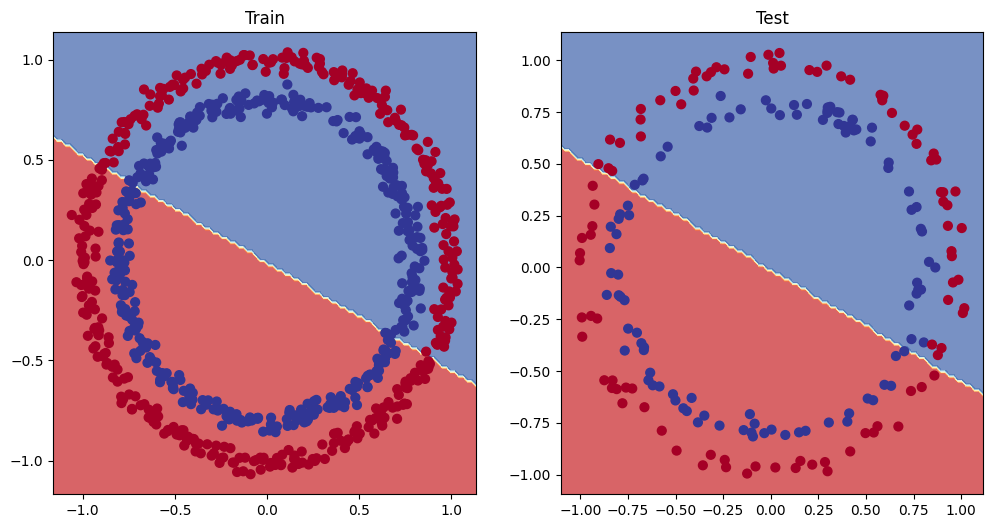

In [35]:
plt.figure(figsize = (12,6))
# plt.subplot(row,col,index)
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0 , X_train , y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0 , X_test , y_test)

- So this is the line that our model is trying to draw through the data . No wonder its getting 50% accuracy and the loss isnt going down. Its just trying to split the data straight through the middle. Its just drawing a straight line , but our data is circular

- Our model is just made of pure **linear layers**

- And whats a linear line? : Straight line

- So if you think about this , even if you are completely new to deep learning , you can ans this ques:

    **Can we ever separate this circular data with straight lines?**


## 5. Improving a model (from a model pespective)

- Ways:
   1. Add more layers : give the model more chances to learn about patterns in the data

   2. Add more hidden units (neurons) : go from 5 hidden units (neurons) to 10 hidden units (neurons)

   3. Fit for longer
   4. Change the activation functions
   5. Change the learning rate : LR is the amount the optimizer will adjust these every epoch , And if its too small our model might not learn anything bcs its taking forever to change these numbers , But on the other side of things , LR is too high , these updates might be too large and our model might just **explode**


- **Exploding gradient problem** : The exploding gradient problem is a challenge encountered during the training of neural networks, particularly deep ones. It occurs when the gradients, which guide the learning process, become excessively large. This leads to unstable training, where large weight updates cause the model to diverge from the optimal solution and potentially fail to learn

- The **vanishing gradient problem** is a challenge encountered during the training of deep neural networks, particularly those with many layers, where the gradients used to update the network's weights become vanishingly small during backpropagation

- The more parameters our model has to represent our data **potentially** . Potentially because some of these things
might not necessarily work

- eg: Our data set is quite simple here , so maybe if we added too many layers , our model will try to learn things that are too complex , its trying to adjust too many numbers for the dataset we have

- Same thing for more hidden units
